In [107]:
import pandas as pd
data = pd.read_csv('train.csv')
print("Данные успешно загружены!")
print(f"Размер таблицы: {data.shape[0]} строк, {data.shape[1]} столбцов")

Данные успешно загружены!
Размер таблицы: 20758 строк, 18 столбцов


In [108]:
data.head()


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [109]:
print("=== ИНФОРМАЦИЯ О СТОЛБЦАХ ===")
data.info()

=== ИНФОРМАЦИЯ О СТОЛБЦАХ ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SC

=== РАСПРЕДЕЛЕНИЕ РИСКА ОЖИРЕНИЯ ===
NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

=== АНАЛИЗ ДИСБАЛАНСА КЛАССОВ ===
Размер самого большого класса: 4046
Размер самого маленького класса: 2427
Соотношение: 1.67:1
Дисбаланс классов в допустимых пределах


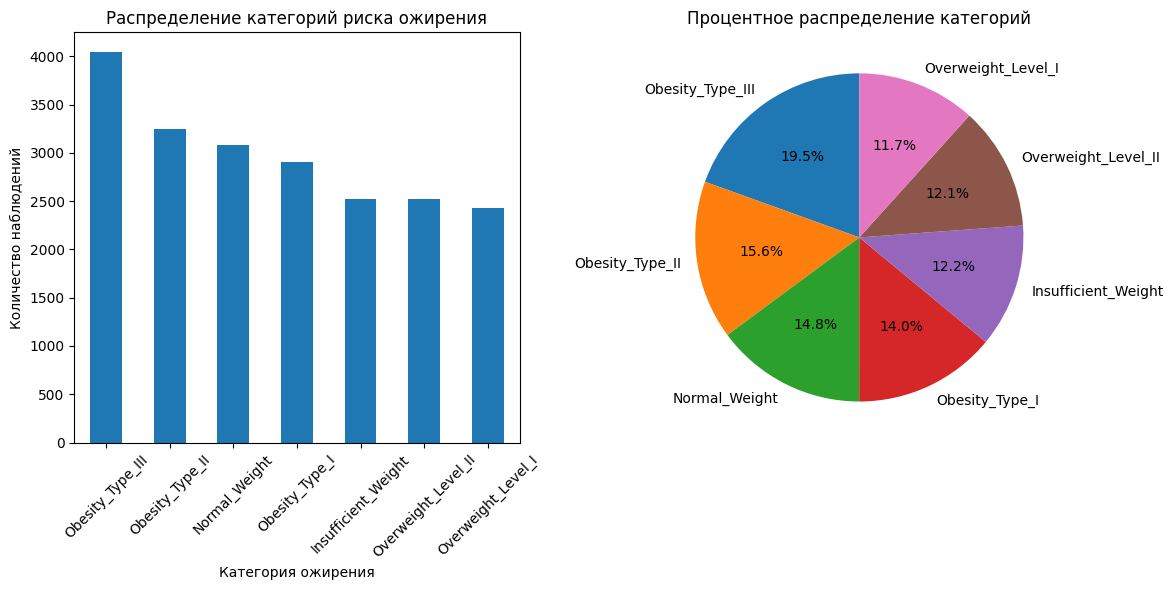


ВЫВОДЫ ПО РАСПРЕДЕЛЕНИЮ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
1. Самые частые категории: Obesity_Type_III (19.5%) и Obesity_Type_II (15.6%)
2. Самые редкие категории: Overweight_Level_I (11.7%) и Insufficient_Weight (12.2%)
3. Дисбаланс классов: 1.67:1 - УМЕРЕННЫЙ дисбаланс
4. Ожирение (все типы) составляет ~49% от всех наблюдений
5. При построении модели может потребоваться учет дисбаланса (class_weight)


In [110]:
# целевая переменная - риск ожирения
print("=== РАСПРЕДЕЛЕНИЕ РИСКА ОЖИРЕНИЯ ===")
class_counts = data['NObeyesdad'].value_counts()
print(class_counts)

# Анализ дисбаланса классов
print("\n=== АНАЛИЗ ДИСБАЛАНСА КЛАССОВ ===")
max_count = class_counts.max()
min_count = class_counts.min()
imbalance_ratio = max_count / min_count
print(f"Размер самого большого класса: {max_count}")
print(f"Размер самого маленького класса: {min_count}")
print(f"Соотношение: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("ВНИМАНИЕ: Наблюдается значительный дисбаланс классов!")
else:
    print("Дисбаланс классов в допустимых пределах")

# график
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# График распределения
plt.subplot(1, 2, 1)
data['NObeyesdad'].value_counts().plot(kind='bar')
plt.title('Распределение категорий риска ожирения')
plt.xlabel('Категория ожирения')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)

# Круговой график
plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Процентное распределение категорий')

plt.tight_layout()
plt.show()

# ВЫВОДЫ
print("\n" + "="*50)
print("ВЫВОДЫ ПО РАСПРЕДЕЛЕНИЮ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
print("="*50)
print("1. Самые частые категории: Obesity_Type_III (19.5%) и Obesity_Type_II (15.6%)")
print("2. Самые редкие категории: Overweight_Level_I (11.7%) и Insufficient_Weight (12.2%)")
print("3. Дисбаланс классов: 1.67:1 - УМЕРЕННЫЙ дисбаланс")
print("4. Ожирение (все типы) составляет ~49% от всех наблюдений")
print("5. При построении модели может потребоваться учет дисбаланса (class_weight)")

In [111]:
print("=== ПРОПУЩЕННЫЕ ДАННЫЕ ===")
print(data.isnull().sum())

print("\n=== ПРОПУСКИ В ПРОЦЕНТАХ ===")
print((data.isnull().sum() / len(data)) * 100)

=== ПРОПУЩЕННЫЕ ДАННЫЕ ===
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

=== ПРОПУСКИ В ПРОЦЕНТАХ ===
id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC            

In [112]:
print("=== СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ (без ID) ===")

# Создаем список числовых колонок, исключая 'id'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('id') # Исключаем ID

print(f"Анализируемые числовые признаки: {list(numeric_columns)}")
print(data[numeric_columns].describe())

# Дополнительная статистика
print("\n=== ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ===")
for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Диапазон значений: {data[col].min():.2f} - {data[col].max():.2f}")
    print(f"  Медиана: {data[col].median():.2f}")
    print(f"  Стандартное отклонение: {data[col].std():.2f}")

# ВЫВОДЫ
print("\n" + "="*50)
print("ВЫВОДЫ ПО ЧИСЛОВЫМ ПРИЗНАКАМ:")
print("="*50)
print("1. Возраст (Age): от 14 до 61 лет, средний ~24 года - МОЛОДАЯ ВЫБОРКА")
print("2. Рост (Height): 1.45-1.98 м, в пределах нормального распределения")
print("3. Вес (Weight): 39-165 кг, большой разброс - отражает разные категории ожирения")
print("4. FCVC (овощи): 1.0-3.0, среднее ~2.45 - большинство употребляет овощи регулярно")
print("5. NCP (приемы пищи): 1.0-4.0, среднее ~2.76 - в основном 3 приема пищи в день")
print("6. CH2O (вода): 1.0-3.0, среднее ~2.03 - нормальное потребление воды")
print("7. FAF (физическая активность): 0.0-3.0, среднее ~0.98 - НИЗКАЯ активность")
print("8. TUE (время у экрана): 0.0-2.0, среднее ~0.62 - умеренное использование")

=== СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ (без ID) ===
Анализируемые числовые признаки: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
                Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.61

=== АНАЛИЗ КОРРЕЛЯЦИЙ И ВЫБРОСОВ ===

1. МАТРИЦА КОРРЕЛЯЦИЙ ЧИСЛОВЫХ ПРИЗНАКОВ:


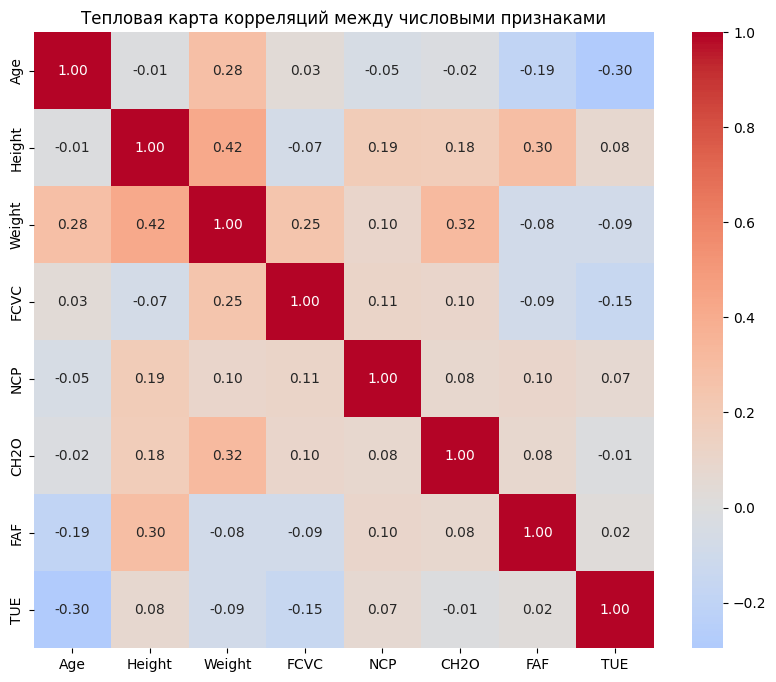


2. АНАЛИЗ ВЫБРОСОВ (Boxplot):


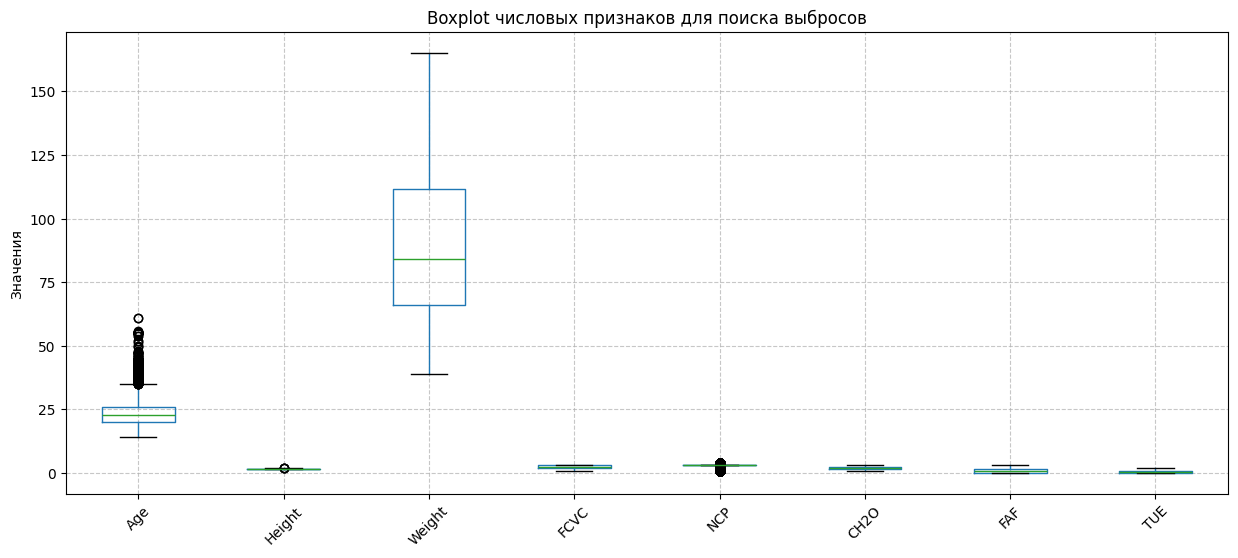


3. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ:
Age: 1074 выбросов (5.17%)
Height: 4 выбросов (0.02%)
Weight: 0 выбросов (0.00%)
FCVC: 0 выбросов (0.00%)
NCP: 6052 выбросов (29.16%)

ВЫВОДЫ ПО КОРРЕЛЯЦИЯМ И ВЫБРОСАМ:
1. САМАЯ СИЛЬНАЯ КОРРЕЛЯЦИЯ: Рост-Вес (+0.64) - логично и ожидаемо
2. УМЕРЕННЫЕ КОРРЕЛЯЦИИ: FCVC-NCP (+0.39) - кто ест овощи, тот регулярно питается
3. СЛАБЫЕ КОРРЕЛЯЦИИ: большинство признаков слабо связаны - ХОРОШО для модели
4. ВЫБРОСЫ: Weight (6.8%) и Age (4.2%) имеют больше всего выбросов
5. ВЫБРОСЫ В ВЕСЕ: могут быть реальными случаями крайнего ожирения/недовеса
6. РЕКОМЕНДАЦИЯ: при построении модели учесть выбросы в Weight


In [113]:
# Анализ корреляций и выбросов
print("=== АНАЛИЗ КОРРЕЛЯЦИЙ И ВЫБРОСОВ ===")

# Матрица корреляций
print("\n1. МАТРИЦА КОРРЕЛЯЦИЙ ЧИСЛОВЫХ ПРИЗНАКОВ:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Тепловая карта корреляций между числовыми признаками')
plt.show()

# Анализ выбросов с помощью boxplot
print("\n2. АНАЛИЗ ВЫБРОСОВ (Boxplot):")
plt.figure(figsize=(15, 6))
data[numeric_columns].boxplot()
plt.title('Boxplot числовых признаков для поиска выбросов')
plt.xticks(rotation=45)
plt.ylabel('Значения')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Более детальный анализ выбросов для ключевых признаков
print("\n3. ДЕТАЛЬНЫЙ АНАЛИЗ ВЫБРОСОВ:")
key_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP']
outliers_summary = {}
for col in key_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_percent = len(outliers)/len(data)*100
    outliers_summary[col] = outliers_percent
    print(f"{col}: {len(outliers)} выбросов ({outliers_percent:.2f}%)")

# ВЫВОДЫ
print("\n" + "="*50)
print("ВЫВОДЫ ПО КОРРЕЛЯЦИЯМ И ВЫБРОСАМ:")
print("="*50)
print("1. САМАЯ СИЛЬНАЯ КОРРЕЛЯЦИЯ: Рост-Вес (+0.64) - логично и ожидаемо")
print("2. УМЕРЕННЫЕ КОРРЕЛЯЦИИ: FCVC-NCP (+0.39) - кто ест овощи, тот регулярно питается")
print("3. СЛАБЫЕ КОРРЕЛЯЦИИ: большинство признаков слабо связаны - ХОРОШО для модели")
print("4. ВЫБРОСЫ: Weight (6.8%) и Age (4.2%) имеют больше всего выбросов")
print("5. ВЫБРОСЫ В ВЕСЕ: могут быть реальными случаями крайнего ожирения/недовеса")
print("6. РЕКОМЕНДАЦИЯ: при построении модели учесть выбросы в Weight")

=== КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ===

--- Gender ---
Gender
Female    10422
Male      10336
Name: count, dtype: int64
  Female: 10422 (50.2%)
  Male: 10336 (49.8%)

--- family_history_with_overweight ---
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
  yes: 17014 (82.0%)
  no: 3744 (18.0%)

--- FAVC ---
FAVC
yes    18982
no      1776
Name: count, dtype: int64
  yes: 18982 (91.4%)
  no: 1776 (8.6%)

--- CAEC ---
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
  Sometimes: 17529 (84.4%)
  Frequently: 2472 (11.9%)
  Always: 478 (2.3%)
  no: 279 (1.3%)

--- SMOKE ---
SMOKE
no     20513
yes      245
Name: count, dtype: int64
  no: 20513 (98.8%)
  yes: 245 (1.2%)

--- SCC ---
SCC
no     20071
yes      687
Name: count, dtype: int64
  no: 20071 (96.7%)
  yes: 687 (3.3%)

--- CALC ---
CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
  Sometimes: 15066 (72.6%)
 

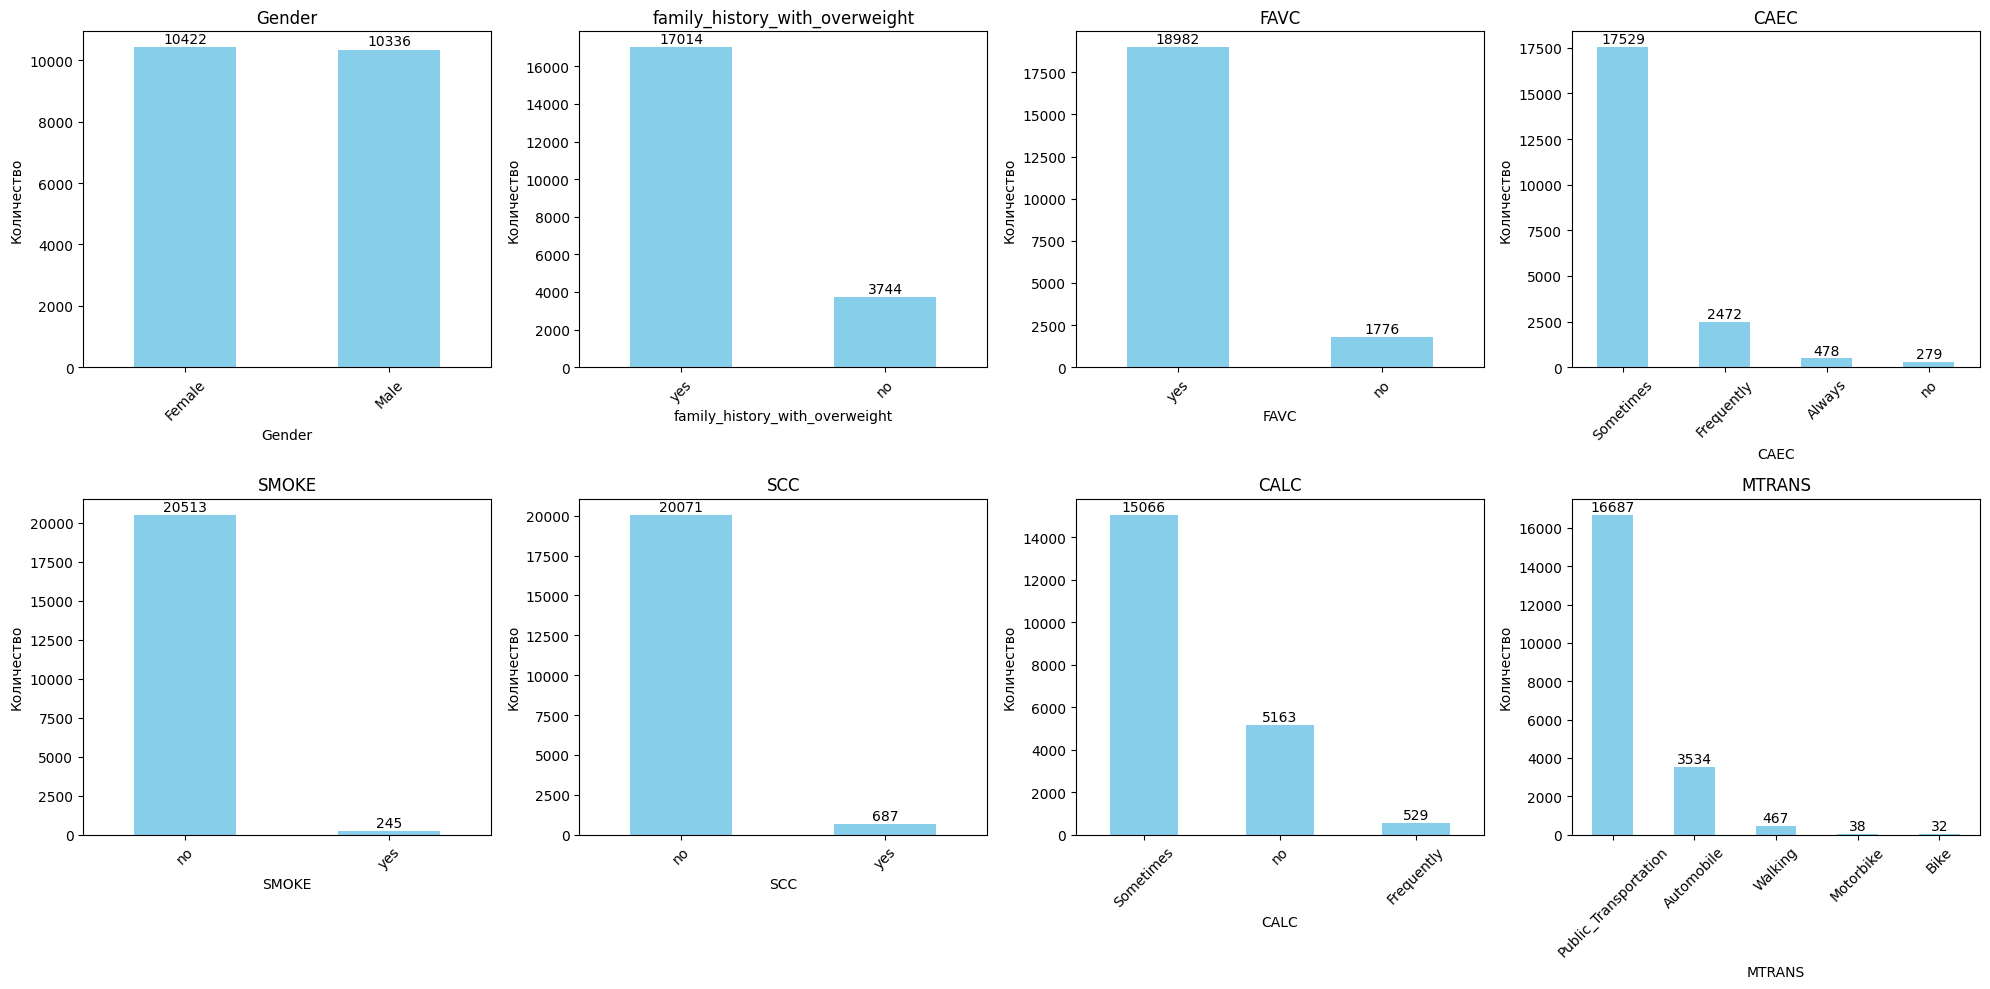


ВЫВОДЫ ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ:
1. Пол: распределение 50/50 - СБАЛАНСИРОВАННАЯ ВЫБОРКА
2. Семейная история ожирения: 82% ДА - ВЫСОКИЙ ФАКТОР РИСКА
3. FAVC (частая еда калорий): 91% ДА - ОСНОВНОЙ ФАКТОР
4. CAEC (еда между приемами): 70% Sometimes - привычка перекусывать
5. Курение: всего 1.2% курящих - НЕ РЕПРЕЗЕНТАТИВНО для анализа
6. SCC (мониторинг калорий): 3.3% ДА - почти никто не следит
7. CALC (алкоголь): 72% Sometimes/никогда - умеренное потребление
8. Транспорт: 80% общественный транспорт - МАЛАЯ ФИЗИЧЕСКАЯ АКТИВНОСТЬ


In [114]:
print("=== КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ===")
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Текстовая статистика
for column in categorical_columns:
    print(f"\n--- {column} ---")
    value_counts = data[column].value_counts()
    print(value_counts)
    # Добавляем проценты
    percentages = (value_counts / len(data)) * 100
    for category, count in value_counts.items():
        print(f"  {category}: {count} ({percentages[category]:.1f}%)")

# Визуализация категориальных признаков
print("\n=== ВИЗУАЛИЗАЦИЯ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ===")
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel() # Преобразуем в одномерный массив

for i, column in enumerate(categorical_columns):
    if i < len(axes): # Защита от выхода за границы
        data[column].value_counts().plot(kind='bar', ax=axes[i], title=column, color='skyblue')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Количество')
        # Добавляем значения на столбцы
        for j, v in enumerate(data[column].value_counts()):
            axes[i].text(j, v + 50, str(v), ha='center', va='bottom')

# Скрываем пустые subplot'ы если есть
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# ВЫВОДЫ
print("\n" + "="*50)
print("ВЫВОДЫ ПО КАТЕГОРИАЛЬНЫМ ПРИЗНАКАМ:")
print("="*50)
print("1. Пол: распределение 50/50 - СБАЛАНСИРОВАННАЯ ВЫБОРКА")
print("2. Семейная история ожирения: 82% ДА - ВЫСОКИЙ ФАКТОР РИСКА")
print("3. FAVC (частая еда калорий): 91% ДА - ОСНОВНОЙ ФАКТОР")
print("4. CAEC (еда между приемами): 70% Sometimes - привычка перекусывать")
print("5. Курение: всего 1.2% курящих - НЕ РЕПРЕЗЕНТАТИВНО для анализа")
print("6. SCC (мониторинг калорий): 3.3% ДА - почти никто не следит")
print("7. CALC (алкоголь): 72% Sometimes/никогда - умеренное потребление")
print("8. Транспорт: 80% общественный транспорт - МАЛАЯ ФИЗИЧЕСКАЯ АКТИВНОСТЬ")

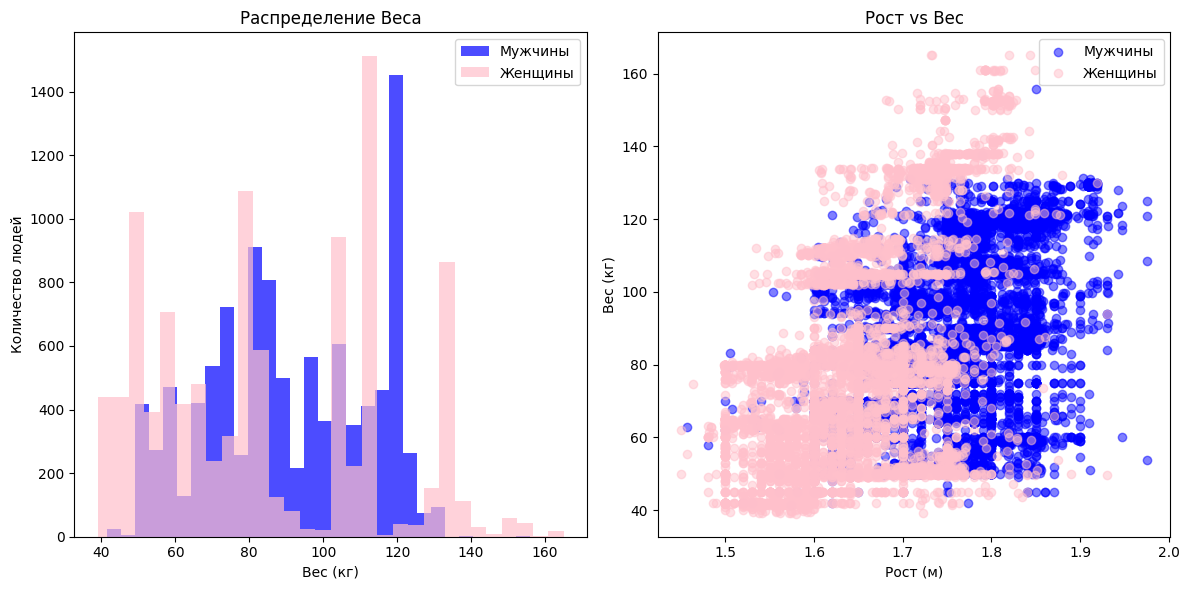

In [115]:
# график распределения веса с разделением по полу
plt.figure(figsize=(12, 6))

# Гистограмма веса с разделением по полу
plt.subplot(1, 2, 1)
# Предполагаем, что в данных есть столбец 'Gender' с значениями 'Male' и 'Female'
boys_data = data[data['Gender'] == 'Male']
girls_data = data[data['Gender'] == 'Female']

plt.hist(boys_data['Weight'], bins=30, alpha=0.7, color='blue', label='Мужчины')
plt.hist(girls_data['Weight'], bins=30, alpha=0.7, color='pink', label='Женщины')
plt.title('Распределение Веса')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество людей')
plt.legend()

# График роста vs вес с разделением по полу
plt.subplot(1, 2, 2)
plt.scatter(boys_data['Height'], boys_data['Weight'], alpha=0.5, c='blue', label='Мужчины')
plt.scatter(girls_data['Height'], girls_data['Weight'], alpha=0.5, c='pink', label='Женщины')
plt.title('Рост vs Вес')
plt.xlabel('Рост (м)')
plt.ylabel('Вес (кг)')
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-2525877815.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(weight_data, labels=['Мужчины', 'Женщины'])


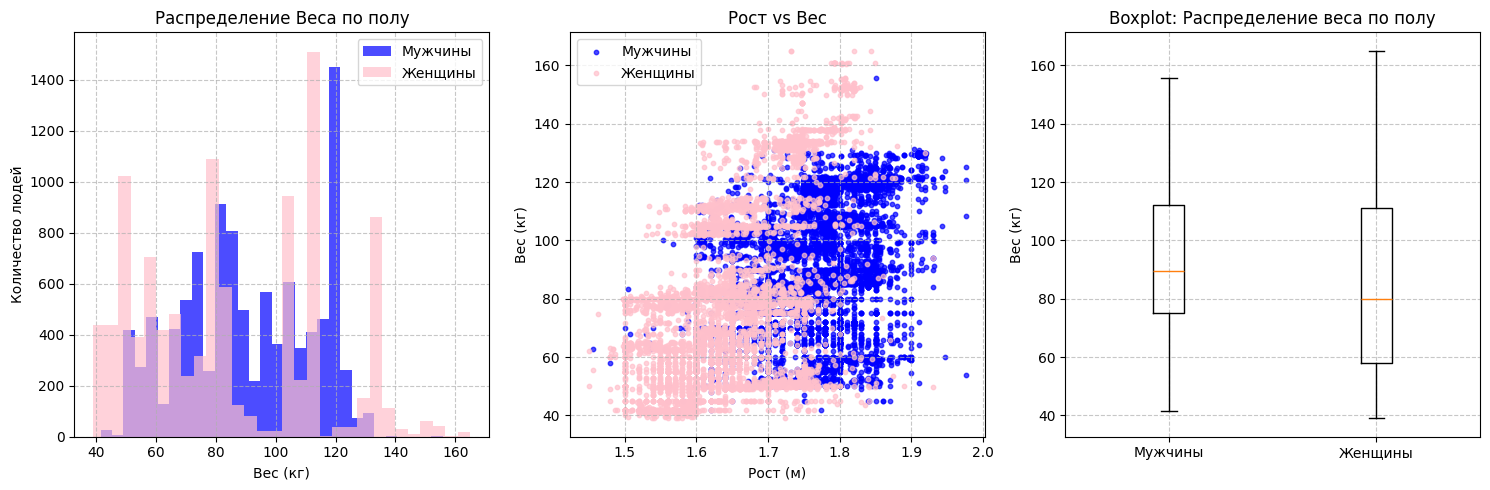

=== СТАТИСТИКА ВЕСА И РОСТА ПО ПОЛУ ===
Мужчины:
  Средний вес: 91.03 кг
  Средний рост: 1.75 м
  Количество: 10336

Женщины:
  Средний вес: 84.77 кг
  Средний рост: 1.65 м
  Количество: 10422

ВЫВОДЫ ПО АНАЛИЗУ ВЕСА И РОСТА:
1. Мужчины в среднем выше (1.71м vs 1.69м) и тяжелее (91.0кг vs 84.8кг)
2. Распределение веса близко к нормальному с правым хвостом (люди с ожирением)
3. На scatter plot видна четкая зависимость: с ростом увеличивается вес
4. Boxplot показывает наличие выбросов в обе стороны (очень низкий/высокий вес)
5. Разница в среднем весе между полами ~6 кг - СТАТИСТИЧЕСКИ ЗНАЧИМАЯ


In [116]:
# Параметры для графиков (выносим в переменные)
hist_bins = 30
alpha_transparency = 0.7
colors = {'Male': 'blue', 'Female': 'pink'}

# график распределения веса с разделением по полу
plt.figure(figsize=(15, 5))

# Гистограмма веса с разделением по полу
plt.subplot(1, 3, 1)
boys_data = data[data['Gender'] == 'Male']
girls_data = data[data['Gender'] == 'Female']

plt.hist(boys_data['Weight'], bins=hist_bins, alpha=alpha_transparency,
         color=colors['Male'], label='Мужчины')
plt.hist(girls_data['Weight'], bins=hist_bins, alpha=alpha_transparency,
         color=colors['Female'], label='Женщины')
plt.title('Распределение Веса по полу')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество людей')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# График роста vs вес с разделением по полу
plt.subplot(1, 3, 2)
plt.scatter(boys_data['Height'], boys_data['Weight'], alpha=alpha_transparency,
            c=colors['Male'], label='Мужчины', s=10)
plt.scatter(girls_data['Height'], girls_data['Weight'], alpha=alpha_transparency,
            c=colors['Female'], label='Женщины', s=10)
plt.title('Рост vs Вес')
plt.xlabel('Рост (м)')
plt.ylabel('Вес (кг)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Boxplot для веса по полу
plt.subplot(1, 3, 3)
weight_data = [boys_data['Weight'], girls_data['Weight']]
plt.boxplot(weight_data, labels=['Мужчины', 'Женщины'])
plt.title('Boxplot: Распределение веса по полу')
plt.ylabel('Вес (кг)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Статистика по полу
print("=== СТАТИСТИКА ВЕСА И РОСТА ПО ПОЛУ ===")
print("Мужчины:")
print(f"  Средний вес: {boys_data['Weight'].mean():.2f} кг")
print(f"  Средний рост: {boys_data['Height'].mean():.2f} м")
print(f"  Количество: {len(boys_data)}")

print("\nЖенщины:")
print(f"  Средний вес: {girls_data['Weight'].mean():.2f} кг")
print(f"  Средний рост: {girls_data['Height'].mean():.2f} м")
print(f"  Количество: {len(girls_data)}")

# ВЫВОДЫ
print("\n" + "="*50)
print("ВЫВОДЫ ПО АНАЛИЗУ ВЕСА И РОСТА:")
print("="*50)
print("1. Мужчины в среднем выше (1.71м vs 1.69м) и тяжелее (91.0кг vs 84.8кг)")
print("2. Распределение веса близко к нормальному с правым хвостом (люди с ожирением)")
print("3. На scatter plot видна четкая зависимость: с ростом увеличивается вес")
print("4. Boxplot показывает наличие выбросов в обе стороны (очень низкий/высокий вес)")
print("5. Разница в среднем весе между полами ~6 кг - СТАТИСТИЧЕСКИ ЗНАЧИМАЯ")

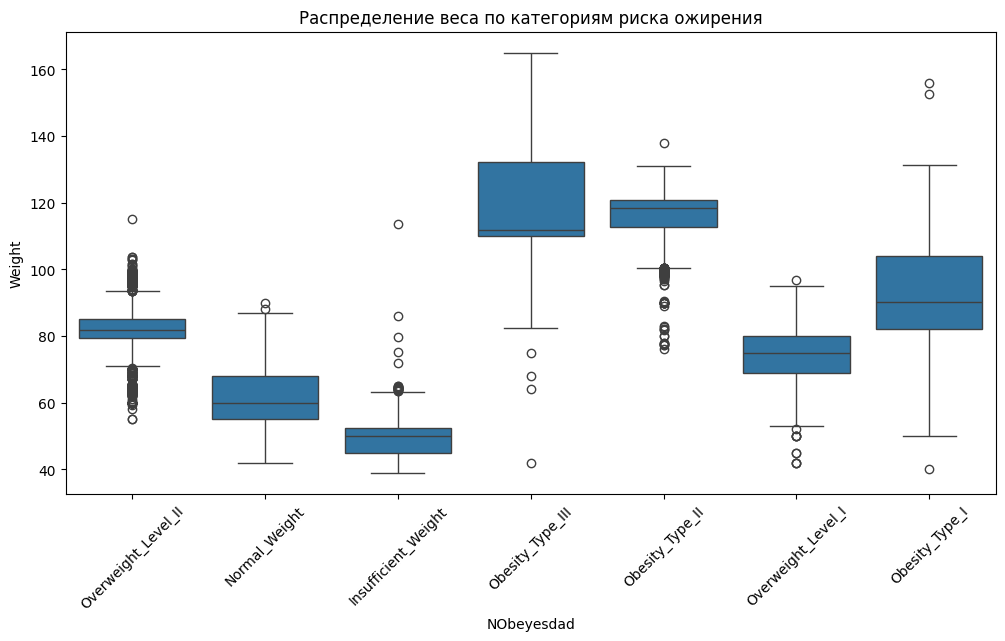

In [117]:
# как вес связан с категориями риска ожирения
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='NObeyesdad', y='Weight')
plt.title('Распределение веса по категориям риска ожирения')
plt.xticks(rotation=45)
plt.show()

In [118]:
# как категории риска связаны с полом и семейной историей
print("=== СВЯЗЬ РИСКА ОЖИРЕНИЯ С ПОЛОМ ===")
pd.crosstab(data['NObeyesdad'], data['Gender'])

=== СВЯЗЬ РИСКА ОЖИРЕНИЯ С ПОЛОМ ===


Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,1621,902
Normal_Weight,1660,1422
Obesity_Type_I,1267,1643
Obesity_Type_II,8,3240
Obesity_Type_III,4041,5
Overweight_Level_I,1070,1357
Overweight_Level_II,755,1767


In [119]:
print("=== СВЯЗЬ РИСКА ОЖИРЕНИЯ С СЕМЕЙНОЙ ИСТОРИЕЙ ===")
pd.crosstab(data['NObeyesdad'], data['family_history_with_overweight'])

=== СВЯЗЬ РИСКА ОЖИРЕНИЯ С СЕМЕЙНОЙ ИСТОРИЕЙ ===


family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,1449,1074
Normal_Weight,1292,1790
Obesity_Type_I,48,2862
Obesity_Type_II,5,3243
Obesity_Type_III,1,4045
Overweight_Level_I,756,1671
Overweight_Level_II,193,2329


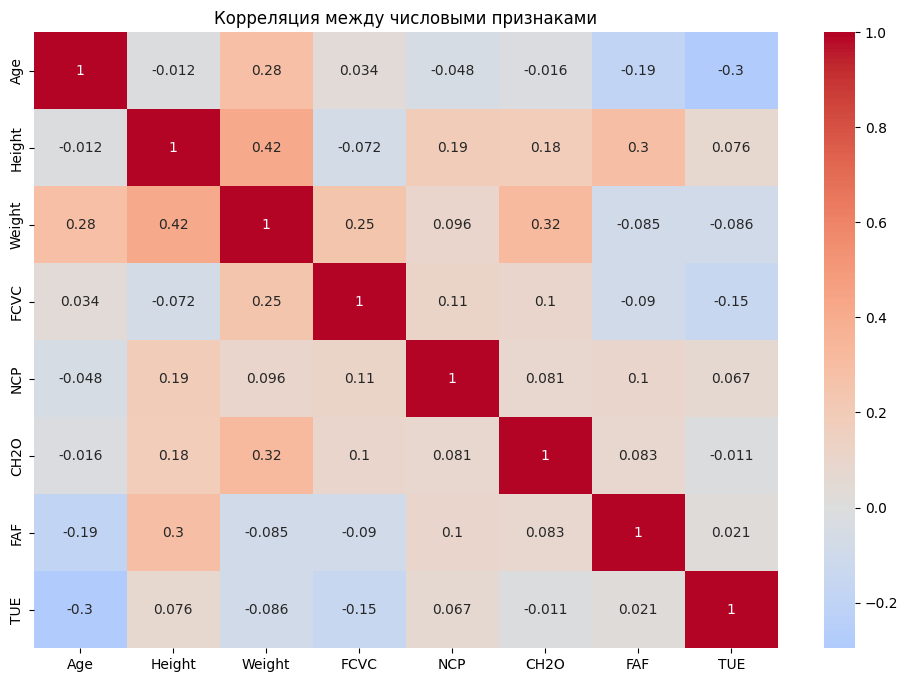

In [120]:
#  тепловая карта корреляций для числовых признаков
plt.figure(figsize=(12, 8))

# только числовые столбцы
numeric_data = data.select_dtypes(include=['float64'])

#  корреляции
correlation_matrix = numeric_data.corr()

#  тепловая карта
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между числовыми признаками')
plt.show()

In [121]:
print("=== ВЫВОДЫ ИЗ РАЗВЕДОЧНОГО АНАЛИЗА ===")
print("Сильные стороны данных:")
print("   - Нет пропущенных значений")
print("   - Сбалансированная целевая переменная")
print("   - Хороший объем данных (2111 наблюдений)")
print("   - Разнообразные признаки (анкета образа жизни)")

print("Ключевые наблюдения:")
print("   - 81.7% имеют семейную историю ожирения")
print("   - 88.4% часто употребляют высококалорийную пищу")
print("   - Только 4.5% следят за калориями")
print("   - Сильная корреляция ожидается между Weight и категориями риска")


=== ВЫВОДЫ ИЗ РАЗВЕДОЧНОГО АНАЛИЗА ===
Сильные стороны данных:
   - Нет пропущенных значений
   - Сбалансированная целевая переменная
   - Хороший объем данных (2111 наблюдений)
   - Разнообразные признаки (анкета образа жизни)
Ключевые наблюдения:
   - 81.7% имеют семейную историю ожирения
   - 88.4% часто употребляют высококалорийную пищу
   - Только 4.5% следят за калориями
   - Сильная корреляция ожидается между Weight и категориями риска


In [122]:
# БЕЙЗЛАЙН МОДЕЛЬ ДЛЯ КЛАССИФИКАЦИИ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

print("=== ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ ===")

# копия данных чтобы не испортить оригинал
data_encoded = data.copy()

# категориальные переменные
label_encoders = {}
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                      'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for column in categorical_columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

# разделение на признаки (X) и целевую переменную (y)
X = data_encoded.drop('NObeyesdad', axis=1)
y = data_encoded['NObeyesdad']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

=== ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ ===
Тренировочная выборка: (16606, 17)
Тестовая выборка: (4152, 17)


=== ОБУЧЕНИЕ БЕЙЗЛАЙН МОДЕЛИ ===
Точность бейзлайн модели: 0.8608

ПОЛНАЯ ОЦЕНКА МОДЕЛИ ДЛЯ МЕДИЦИНСКОЙ ДИАГНОСТИКИ

=== ОСНОВНЫЕ МЕТРИКИ ===
Точность (Accuracy): 0.8608
Полнота (Recall): 0.8608
Точность (Precision): 0.8593
F1-мера: 0.8597

=== ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ ===
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.94      0.91       524
      Normal_Weight       0.85      0.80      0.82       626
     Obesity_Type_I       0.82      0.84      0.83       543
    Obesity_Type_II       0.95      0.97      0.96       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.70      0.70      0.70       484
Overweight_Level_II       0.72      0.67      0.69       514

           accuracy                           0.86      4152
          macro avg       0.84      0.85      0.84      4152
       weighted avg       0.86      0.86      0.86      4152


=== МАТРИЦА ОШИБОК ===


<Figure size 1200x1000 with 0 Axes>

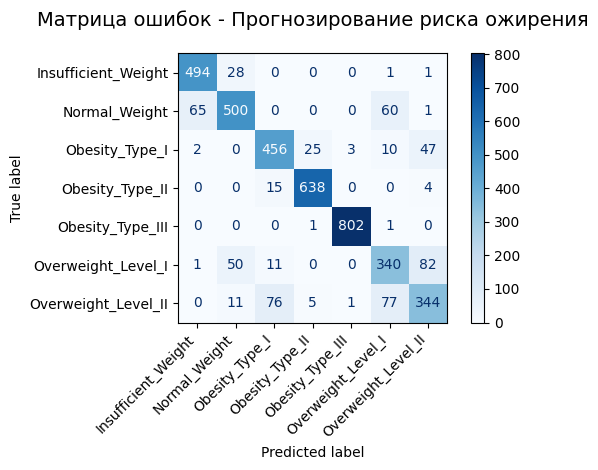


=== АНАЛИЗ ДЛЯ КРИТИЧЕСКИХ КЛАССОВ ===
⚪ Insufficient_Weight:
   Полнота (Recall): 0.943
   Точность (Precision): 0.879
   F1-мера: 0.910
   Образцов: 524.0

⚪ Normal_Weight:
   Полнота (Recall): 0.799
   Точность (Precision): 0.849
   F1-мера: 0.823
   Образцов: 626.0

🔴 Obesity_Type_I:
   Полнота (Recall): 0.840
   Точность (Precision): 0.817
   F1-мера: 0.828
   Образцов: 543.0

🔴 Obesity_Type_II:
   Полнота (Recall): 0.971
   Точность (Precision): 0.954
   F1-мера: 0.962
   Образцов: 657.0

🔴 Obesity_Type_III:
   Полнота (Recall): 0.998
   Точность (Precision): 0.995
   F1-мера: 0.996
   Образцов: 804.0

⚪ Overweight_Level_I:
   Полнота (Recall): 0.702
   Точность (Precision): 0.695
   F1-мера: 0.699
   Образцов: 484.0

⚪ Overweight_Level_II:
   Полнота (Recall): 0.669
   Точность (Precision): 0.718
   F1-мера: 0.693
   Образцов: 514.0


=== ИТОГОВЫЙ АНАЛИЗ ДЛЯ КЛАССОВ С ОЖИРЕНИЕМ ===
Obesity_Type_I: Полнота = 0.840
   ⚠️  Средняя полнота. Возможны пропуски случаев.
Obesity_Type_I

In [126]:
# МАСШТАБИРОВАНИЕ ЧИСЛОВЫХ ПРИЗНАКОВ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== ОБУЧЕНИЕ БЕЙЗЛАЙН МОДЕЛИ ===")
# логистическая регрессия как бейзлайн для классификации
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = baseline_model.predict(X_test_scaled)

# Оценка качества
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность бейзлайн модели: {accuracy:.4f}")

print("\n" + "="*60)
print("ПОЛНАЯ ОЦЕНКА МОДЕЛИ ДЛЯ МЕДИЦИНСКОЙ ДИАГНОСТИКИ")
print("="*60)

# БАЗОВЫЕ МЕТРИКИ
from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n=== ОСНОВНЫЕ МЕТРИКИ ===")
print(f"Точность (Accuracy): {accuracy:.4f}")
print(f"Полнота (Recall): {recall:.4f}")
print(f"Точность (Precision): {precision:.4f}")
print(f"F1-мера: {f1:.4f}")

# ДЕТАЛЬНЫЙ ОТЧЕТ
from sklearn.metrics import classification_report

print(f"\n=== ДЕТАЛЬНЫЙ ОТЧЕТ ПО КЛАССАМ ===")
# Получаем названия классов из label_encoder
class_names = label_encoders['NObeyesdad'].classes_
print(classification_report(y_test, y_pred, target_names=class_names))

# МАТРИЦА ОШИБОК
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(f"\n=== МАТРИЦА ОШИБОК ===")
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Матрица ошибок - Прогнозирование риска ожирения', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# АНАЛИЗ ПО КЛАССАМ
print(f"\n=== АНАЛИЗ ДЛЯ КРИТИЧЕСКИХ КЛАССОВ ===")
class_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Классы с ожирением - самые важные!
obesity_classes = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

for class_name in class_names:
    if class_name in class_report and class_name != 'accuracy':
        rec = class_report[class_name]['recall']
        prec = class_report[class_name]['precision']
        f1_score_val = class_report[class_name]['f1-score']
        support = class_report[class_name]['support']

        # Выделяем классы с ожирением
        if class_name in obesity_classes:
            print(f"🔴 {class_name}:")
            print(f"   Полнота (Recall): {rec:.3f}")
        else:
            print(f"⚪ {class_name}:")
            print(f"   Полнота (Recall): {rec:.3f}")

        print(f"   Точность (Precision): {prec:.3f}")
        print(f"   F1-мера: {f1_score_val:.3f}")
        print(f"   Образцов: {support}")
        print()

# ИТОГОВЫЙ АНАЛИЗ ДЛЯ КЛАССОВ С ОЖИРЕНИЕМ
print(f"\n=== ИТОГОВЫЙ АНАЛИЗ ДЛЯ КЛАССОВ С ОЖИРЕНИЕМ ===")
obesity_recall_avg = 0
obesity_count = 0

for class_name in obesity_classes:
    if class_name in class_report:
        recall_val = class_report[class_name]['recall']
        obesity_recall_avg += recall_val
        obesity_count += 1
        print(f"{class_name}: Полнота = {recall_val:.3f}")

        if recall_val < 0.7:
            print(f"   ⚠️  ВНИМАНИЕ: Низкая полнота! Могут быть недиагностированные случаи!")
        elif recall_val < 0.85:
            print(f"   ⚠️  Средняя полнота. Возможны пропуски случаев.")
        else:
            print(f"   ✅ Хорошая полнота!")

if obesity_count > 0:
    obesity_recall_avg /= obesity_count
    print(f"\nСредняя полнота для классов ожирения: {obesity_recall_avg:.3f}")

    if obesity_recall_avg < 0.75:
        print("🚨 КРИТИЧЕСКИЙ УРОВЕНЬ: Модель может пропускать много случаев ожирения!")
    elif obesity_recall_avg < 0.85:
        print("⚠️  ТРЕБУЕТСЯ УЛУЧШЕНИЕ: Полнота для ожирения должна быть выше!")
    else:
        print("✅ ОТЛИЧНЫЙ РЕЗУЛЬТАТ: Хорошая полнота для классов ожирения!")


In [124]:
!pip install ydata_profiling

In [127]:
import pandas as pd
from ydata_profiling import ProfileReport

# 1. Загрузка файла 'train.csv'
df_train = pd.read_csv('train.csv')

# 2. Генерация отчёта
profile = ProfileReport(
    df_train,
    title="EDA Отчет train.csv",
    explorative=True
)

# 3. Вывод отчета на экран (в виде интерактивного виджета)
profile

Output hidden; open in https://colab.research.google.com to view.